In [15]:
!pip install --upgrade datetime
!pip install --upgrade statsmodels
!pip install seaborn

You should consider upgrading via the 'C:\Users\aporfido\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\aporfido\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\aporfido\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [18]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import pandas as pd
import base64
import os
from requests import get, post
import json
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('charts_US_og2.csv')
trend_mapping = {'NEW_ENTRY': 2, 'MOVE_UP': 1, 'SAME_POSITION': 0, 'MOVE_DOWN': -1}
df['trend'] = df['trend'].replace(trend_mapping)
df['date'] = pd.to_datetime(df['date'])
df['day_of_year'] = df['date'].dt.dayofyear
df = df[df['region'] == 'United States']
df = df[df['chart'] == 'top200']

In [4]:
df.columns

Index(['title', 'rank', 'date', 'artist', 'url', 'region', 'chart', 'trend',
       'streams', 'predict_days_stay', 'num_days_cumulative', 'Num_artists',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'artist_id', 'artist_followers',
       'genres', 'artist_popularity', 'type', 'album_names', 'release_dates',
       'artist_total_tracks', 'album_names_count', 'release_dates_count',
       'current_days_count', 'total_days', 'days_it_lasts_further',
       'day_of_year'],
      dtype='object')

In [16]:

# Select relevant columns
selected_columns = ['rank', 'day_of_year', 'trend', 'streams','duration_ms', 
                    'current_days_count', 'artist_followers','artist_total_tracks', 
                    'artist_popularity', 'album_names_count', 'danceability', 'energy', 
                    'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 
                    'liveness', 'valence', 'tempo',  'days_it_lasts_further'
                    ,'streaming_counts_lag_1'
                    ]


# Separate features and target variable
X = df[selected_columns]
y = df['days_it_lasts_further']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numerical columns for preprocessing
categorical_cols = ['trend']
numerical_cols = ['rank', 'day_of_year', 'streams','duration_ms', 'album_names_count','artist_followers','artist_total_tracks', 
                  'artist_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 
                  'liveness', 'valence', 'tempo', 'current_days_count'
                  ,'streaming_counts_lag_1'
                  ]

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])


Random Forest

In [19]:

# Create a random forest regressor pipeline
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', RandomForestRegressor(random_state=42))])

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the random forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f'Random Forest Mean Absolute Error: {mae_rf}')

r2_rf = r2_score(y_test, y_pred_rf)
print(f'R2 Score for Random Forest: {r2_rf}')

feature analysis

In [12]:
import datetime;
i = 1
for url, track_data in df.groupby('url'):
    df.loc[df['url'] == url, f'streaming_counts_lag_p{i}'] = track_data['streams'].shift(i)[ track_data.date == track_data.date.shift(i) + datetime.timedelta(days=i) ]
    df.loc[df['url'] == url, f'stream_count_diff_{i}'] = df[f'streaming_counts_lag_{i}'] - df['streams']



In [14]:
df[f'stream_count_diff_{i}'].fillna(0, inplace=True)
df[f'streaming_counts_lag_{i}'].fillna(0, inplace=True)

print(df.columns)
df[['title','artist','date','streams','streaming_counts_lag_1', 'stream_count_diff_1']][df.title == 'Ni**as In Paris']

Index(['title', 'rank', 'date', 'artist', 'url', 'region', 'chart', 'trend',
       'streams', 'predict_days_stay', 'num_days_cumulative', 'Num_artists',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'artist_id', 'artist_followers',
       'genres', 'artist_popularity', 'type', 'album_names', 'release_dates',
       'artist_total_tracks', 'album_names_count', 'release_dates_count',
       'current_days_count', 'total_days', 'days_it_lasts_further',
       'day_of_year', 'streaming_counts_lag_1', 'stream_count_diff1',
       'streaming_counts_lag_p1', 'stream_count_diff_1'],
      dtype='object')


,title,artist,date,streams,streaming_counts_lag_1,stream_count_diff_1
16,Ni**as In Paris,"JAY-Z, KANYE WEST",2017-01-01,165222.0,0.0,-165222.0
57,Ni**as In Paris,"JAY-Z, KANYE WEST",2017-01-02,132366.0,165222.0,32856.0
107,Ni**as In Paris,"JAY-Z, KANYE WEST",2017-01-03,142322.0,132366.0,-9956.0
280,Ni**as In Paris,"JAY-Z, KANYE WEST",2017-01-07,138086.0,0.0,-138086.0
486,Ni**as In Paris,"JAY-Z, KANYE WEST",2017-01-11,147544.0,0.0,-147544.0
625,Ni**as In Paris,"JAY-Z, KANYE WEST",2017-01-14,151903.0,0.0,-151903.0
673,Ni**as In Paris,"JAY-Z, KANYE WEST",2017-01-15,131341.0,151903.0,20562.0
727,Ni**as In Paris,"JAY-Z, KANYE WEST",2017-01-16,137639.0,131341.0,-6298.0
782,Ni**as In Paris,"JAY-Z, KANYE WEST",2017-01-17,143932.0,137639.0,-6293.0
829,Ni**as In Paris,"JAY-Z, KANYE WEST",2017-01-18,149599.0,143932.0,-5667.0


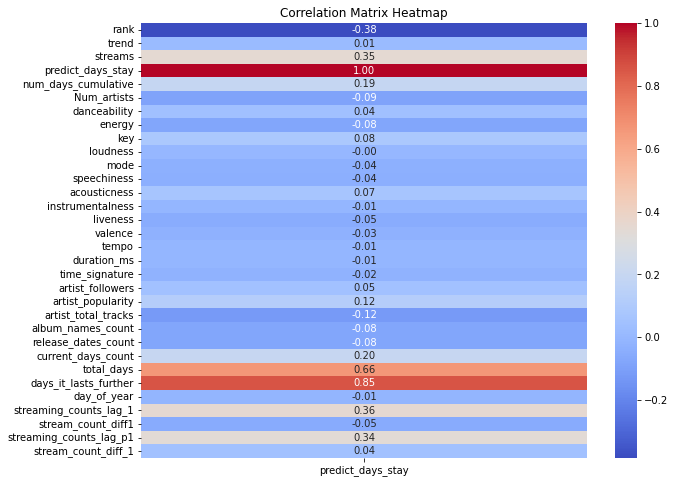

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# print(df.head())

# Assuming df is your DataFrame
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
#sns.heatmap(correlation_matrix[['days_it_lasts_further']], annot=True, cmap='coolwarm', fmt='.2f')
sns.heatmap(correlation_matrix[['predict_days_stay']], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

AUTOCORRELATION

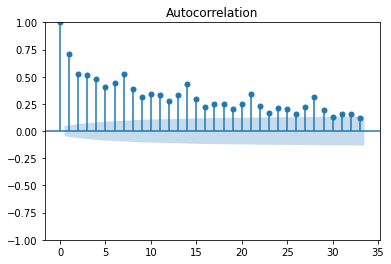

In [38]:
# Assuming 'data' is your time series data
plot_acf(df.groupby('date').mean()['streams'])
plt.show()
